In [140]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaushil268/disease-prediction-using-machine-learning")

print("Path to dataset files:", path)

Path to dataset files: /Users/olga/.cache/kagglehub/datasets/kaushil268/disease-prediction-using-machine-learning/versions/1


In [141]:
import os

files = os.listdir(path)
print(files)

['Training.csv', 'Testing.csv']


In [142]:
training_path = os.path.join(path, 'Training.csv')
test_path = os.path.join(path, 'Testing.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

set_config(transform_output='pandas')

train_data = pd.read_csv(training_path)
test_data = pd.read_csv(test_path)

In [144]:
print(train_data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

In [145]:
print(test_data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

### EDA Train data

In [146]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [147]:
train_data['Unnamed: 133'].unique()

array([nan])

In [148]:
missing_values_train = train_data.isnull().sum()
missing_values_train

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [149]:
train_data['prognosis'].describe()

count                 4920
unique                  41
top       Fungal infection
freq                   120
Name: prognosis, dtype: object

In [150]:
column_list = train_data.columns.tolist()
column_list

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [151]:
duplicate_columns_train = train_data.columns[train_data.columns.duplicated()]
print(f'Duplicate column names: {duplicate_columns_train.tolist()}')

Duplicate column names: []


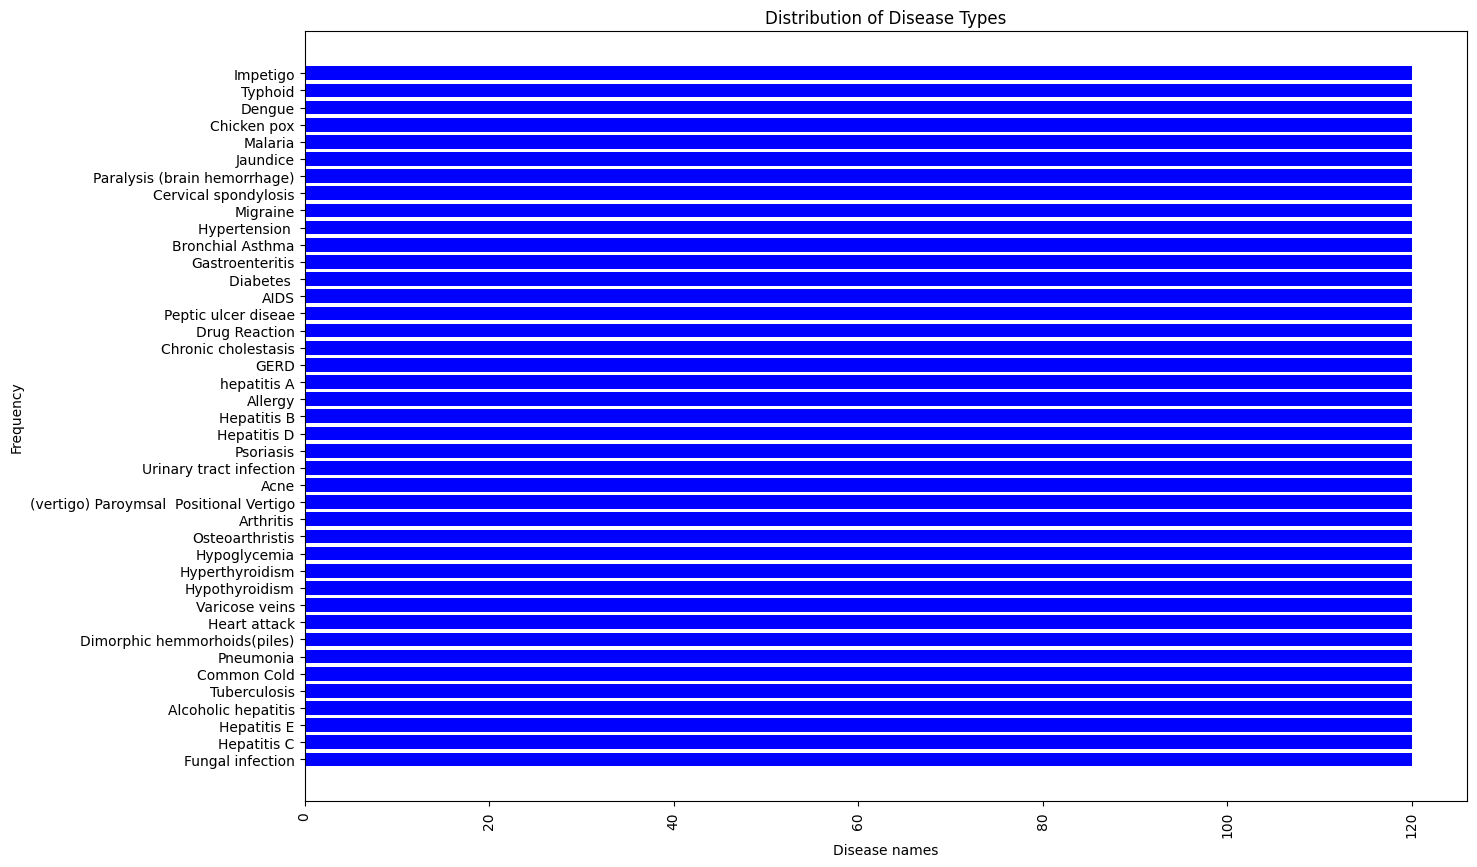

In [152]:
names = train_data['prognosis'].value_counts().keys()
counts = train_data['prognosis'].value_counts().values
plt.subplots(figsize=(15, 10))
plt.barh(names, counts, color='blue')

plt.xlabel('Disease names')
plt.ylabel('Frequency')
plt.title('Distribution of Disease Types')
plt.xticks(rotation=90)
plt.show()

- dataset is balanced, 120 samples

In [153]:
train_data.shape

(4920, 134)

Text(0.5, 1.0, 'Missing Data')

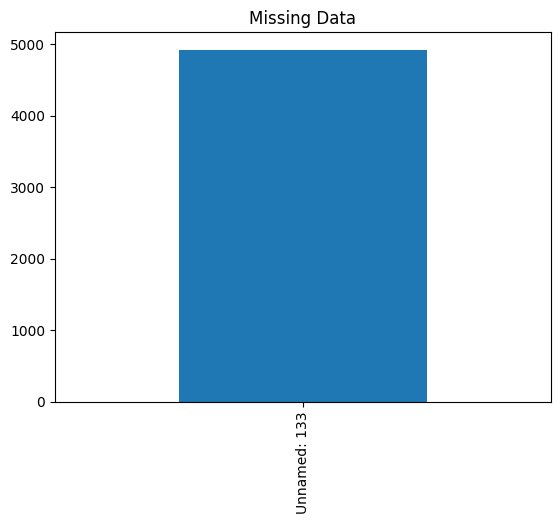

In [154]:
# to show the amount of missing data for each symptom
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing = missing.sort_values(ascending=False)
missing.plot.bar()
plt.title('Missing Data')

In [155]:
train_data.drop(columns=['Unnamed: 133'], inplace=True)

In [156]:
train_data.shape

(4920, 133)

### EDA Test data

In [157]:
test_data.shape

(42, 133)

In [158]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [159]:
column_list = test_data.columns.tolist()
column_list

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [160]:
duplicate_columns_test = test_data.columns[test_data.columns.duplicated()]
print(f'Duplicate column names: {duplicate_columns_test.tolist()}')

Duplicate column names: []


In [161]:
test_data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [162]:
test_data['prognosis'].value_counts()

prognosis
Fungal infection                           2
Hepatitis C                                1
Hepatitis E                                1
Alcoholic hepatitis                        1
Tuberculosis                               1
Common Cold                                1
Pneumonia                                  1
Dimorphic hemmorhoids(piles)               1
Heart attack                               1
Varicose veins                             1
Hypothyroidism                             1
Hyperthyroidism                            1
Hypoglycemia                               1
Osteoarthristis                            1
Arthritis                                  1
(vertigo) Paroymsal  Positional Vertigo    1
Acne                                       1
Urinary tract infection                    1
Psoriasis                                  1
Hepatitis D                                1
Hepatitis B                                1
Allergy                                    1


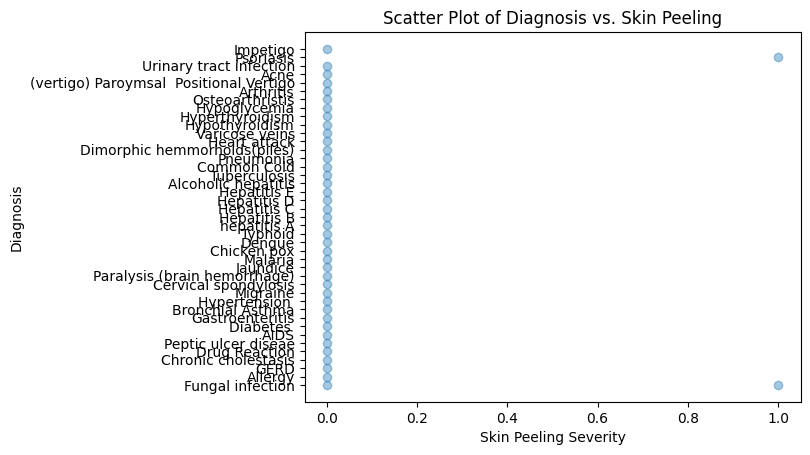

In [163]:
plt.scatter(test_data['skin_peeling'], test_data['prognosis'], alpha=0.4)

plt.xlabel('Skin Peeling Severity')
plt.ylabel('Diagnosis')
plt.title('Scatter Plot of Diagnosis vs. Skin Peeling')
plt.show()

In [164]:
df_test = pd.DataFrame(test_data)

avg_by_diagnosis = df_test.groupby('prognosis').mean()

avg_by_diagnosis.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acne,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alcoholic hepatitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allergy,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merge two datasets

In [165]:
full_data = pd.concat([train_data, test_data], ignore_index=True)

In [166]:
full_data.shape

(4962, 133)

In [167]:
print(f"Original dataset size: {full_data.shape}")
full_data_cleaned = full_data.drop_duplicates()
print(f"After dropping duplicates: {full_data_cleaned.shape}")

Original dataset size: (4962, 133)
After dropping duplicates: (305, 133)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Create a copy and then group
full_data_copy = full_data_cleaned.copy()
symptom_profiles = full_data_copy.groupby('prognosis').mean()

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(symptom_profiles)


In [169]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)

In [170]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

In [171]:
# Attach cluster labels
scaled_full_data = pd.DataFrame(scaled_features, columns=symptom_profiles.columns)
scaled_full_data['prognosis'] = symptom_profiles.index
scaled_full_data['cluster'] = clusters

print(scaled_full_data.head())

                                          itching  skin_rash  \
prognosis                                                      
(vertigo) Paroymsal  Positional Vertigo -0.413808  -0.453291   
AIDS                                    -0.413808  -0.453291   
Acne                                    -0.413808   2.042528   
Alcoholic hepatitis                     -0.413808  -0.453291   
Allergy                                 -0.413808  -0.453291   

                                         nodal_skin_eruptions  \
prognosis                                                       
(vertigo) Paroymsal  Positional Vertigo             -0.158114   
AIDS                                                -0.158114   
Acne                                                -0.158114   
Alcoholic hepatitis                                 -0.158114   
Allergy                                             -0.158114   

                                         continuous_sneezing  shivering  \
prognosis           

In [172]:
from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_features, clusters)
print("Silhouette Score after PCA:", score)


Silhouette Score after PCA: 0.3979283911023894


After applying PCA, the silhouette score improved to 0.398, indicating that the clusters are now reasonably well-separated. This suggests that dimensionality reduction helped KMeans focus on the most relevant symptom patterns, allowing it to group diseases more meaningfully. The clustering now reflects clearer boundaries between disease profiles.

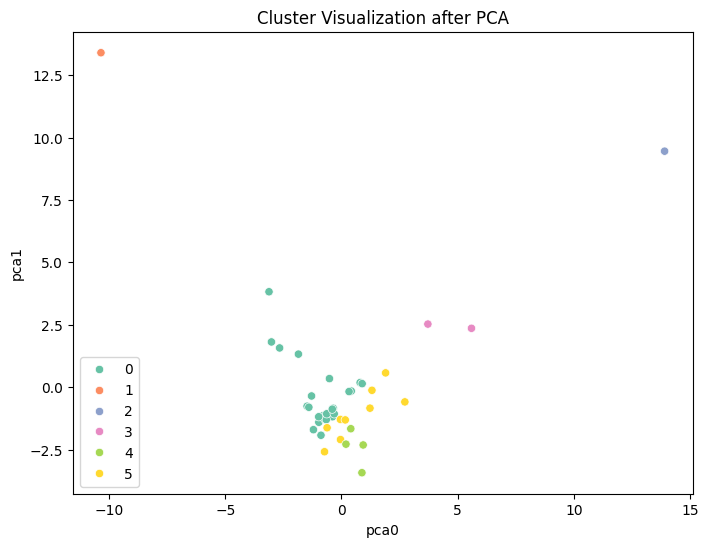

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_2d = PCA(n_components=2).fit_transform(scaled_features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_2d.iloc[:,0], y=pca_2d.iloc[:,1], hue=clusters, palette='Set2')
plt.title("Cluster Visualization after PCA")
plt.show()


In [174]:
cluster_prognosis = scaled_full_data[['prognosis', 'cluster']]

# To see which diseases were grouped together 
for i in sorted(cluster_prognosis['cluster'].unique()):
    diseases = cluster_prognosis[cluster_prognosis['cluster'] == i]['prognosis'].sort_values().tolist()
    print(f'\n Cluster: {i}')
    print(diseases)


 Cluster: 0
['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Diabetes ', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia', 'Impetigo', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Psoriasis', 'Urinary tract infection', 'Varicose veins']

 Cluster: 1
['Hypothyroidism']

 Cluster: 2
['Common Cold']

 Cluster: 3
['Pneumonia', 'Tuberculosis']

 Cluster: 4
['Hepatitis B', 'Hepatitis D', 'Hepatitis E', 'hepatitis A']

 Cluster: 5
['Alcoholic hepatitis', 'Chicken pox', 'Chronic cholestasis', 'Dengue', 'Hepatitis C', 'Jaundice', 'Malaria', 'Peptic ulcer diseae', 'Typhoid']


Why These Clusters Emerged After Scaling
- ✅ Cluster 0: The Big Mixed Group
This cluster contains a diverse set of 24 diseases spanning multiple systems:
Metabolic: Diabetes, Hypertension, Hyperthyroidism, Hypoglycemia
Autoimmune/Musculoskeletal: Arthritis, Osteoarthritis, Cervical spondylosis
Neurological: Migraine, Vertigo, Paralysis (brain hemorrhage)
Infectious: AIDS, Gastroenteritis, Urinary tract infection
Respiratory: Bronchial Asthma
Cardiovascular: Heart attack
Dermatological: Acne, Psoriasis, Drug Reaction, Fungal infection, Impetigo
Gastrointestinal: GERD, Dimorphic hemorrhoids (piles)
Allergic/Immunologic: Allergy
Vascular: Varicose veins
These diseases share broad symptom patterns like pain, fatigue, inflammation, and systemic discomfort. After scaling, symptom intensities were normalized, allowing KMeans to group them based on multi-system overlaps and shared moderate-to-high symptom prevalence across dimensions.
- ✅ Cluster 1: Hormonal Condition
Includes: Hypothyroidism
This disease has a distinct hormonal profile with symptoms like weight gain, fatigue, cold intolerance, and slow metabolic rate. Its low variability and unique symptom signature made it stand apart from other clusters, even after scaling.
- ✅ Cluster 2: Isolated Respiratory Infection
Includes: Common Cold
The Common Cold is a mild, acute respiratory infection with symptoms like sneezing, sore throat, nasal congestion, and low-grade fever. Its episodic and localized symptom profile didn’t align with other clusters, leading to its isolation.
- ✅ Cluster 3: Airborne Pulmonary Infections
Includes: Pneumonia, Tuberculosis
These are serious respiratory infections with symptoms like chronic cough, chest pain, fever, and lung involvement. Their pulmonary focus and severity distinguish them from other infectious diseases, forming a tight cluster.
- ✅ Cluster 4: Hepatic Infections
Includes: Hepatitis A, B, D, E
These diseases are viral liver infections with symptoms like jaundice, abdominal pain, fatigue, and elevated liver enzymes. Their organ-specific symptomatology and shared transmission routes (e.g., contaminated food/water, blood) created a coherent cluster.
- ✅ Cluster 5: Mixed Viral and Parasitic Infections
Includes: Alcoholic hepatitis, Chicken pox, Chronic cholestasis, Dengue, Hepatitis C, Jaundice, Malaria, Peptic ulcer disease, Typhoid
This cluster blends viral, parasitic, and hepatic conditions with symptoms like fever, rash, abdominal pain, vomiting, and systemic inflammation. These diseases are often acute, contagious, or episodic, and scaling revealed similar symptom intensity patterns across them.

-- in the below part:
the goal is to understand if some diseases are very unique and why they ended up in their own clusters.

In [175]:
cluster_counts = cluster_prognosis['cluster'].value_counts()
print("Diseases per cluster:\n", cluster_counts)

Diseases per cluster:
 cluster
0    24
5     9
4     4
3     2
2     1
1     1
Name: count, dtype: int64


- Seems like clusters 2 and 1 with only 1 disease are outliers or just unique.

In [176]:
# to see how often they appear in the dataset

disease_counts = full_data['prognosis'].value_counts()
print("Disease frequences: \n", disease_counts)

Disease frequences: 
 prognosis
Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                 

In [177]:
# When we tried to examine which diseases were grouped together,
# we created cluster_prognosis to identify those in smaller clusters.

outlier_diseases = cluster_prognosis[cluster_prognosis['cluster'].isin(cluster_counts[cluster_counts == 1].index)]
print("Potential outlier diseases:\n", outlier_diseases)


Potential outlier diseases:
                      prognosis  cluster
prognosis                              
Common Cold        Common Cold        2
Hypothyroidism  Hypothyroidism        1


In [178]:
# Get average symptom profile per disease
symptom_profiles = full_data.groupby('prognosis').mean()

# Compare outlier diseases to others
for disease in outlier_diseases['prognosis']:
    similarities = symptom_profiles.dot(symptom_profiles.loc[disease])
    similarities = similarities.sort_values(ascending=False)
    print(f"\nSimilarity of {disease} to other diseases:\n", similarities.head(5))



Similarity of Common Cold to other diseases:
 prognosis
Common Cold     16.226282
Tuberculosis     7.513968
Pneumonia        6.466840
Dengue           5.513968
Chicken pox      4.563554
dtype: float64

Similarity of Hypothyroidism to other diseases:
 prognosis
Hypothyroidism     12.231200
Hyperthyroidism     3.759443
Migraine            1.900826
Hypoglycemia        1.856157
Chicken pox         1.759443
dtype: float64


Result Summary
- Some diseases are very unique
Common Cold and Hypothyroidism emerged as outliers in the clustering results.
Their similarity scores to other diseases are significantly lower, meaning they don’t share many symptoms with the rest of the dataset.
This suggests they have distinct symptom profiles:
Common Cold: localized respiratory symptoms like sneezing, congestion, and mild fever.
Hypothyroidism: slow-onset hormonal symptoms like fatigue, weight gain, and cold intolerance.
- Some diseases have overlapping symptoms
Hypoglycemia, Hyperthyroidism, and Migraine show moderate similarity scores with each other.
These conditions share common symptoms such as:
Fatigue
Dizziness
Sweating or confusion
Pain or discomfort
Their symptom overlap explains why they were grouped together in clusters — they form a metabolic-neurological symptom group.
- Diseases with similar symptoms were grouped.
Diseases with unique or isolated symptom profiles were separated.

- Common Cold and Hypothyroidism are outliers due to their distinct symptom patterns.
Hypoglycemia, Hyperthyroidism, and Migraine form a symptom-sharing trio, which clustering captured well.

/var/folders/wy/v92nv28111j7vk4ynsyxm2700000gn/T/ipykernel_2014/3090373786.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))


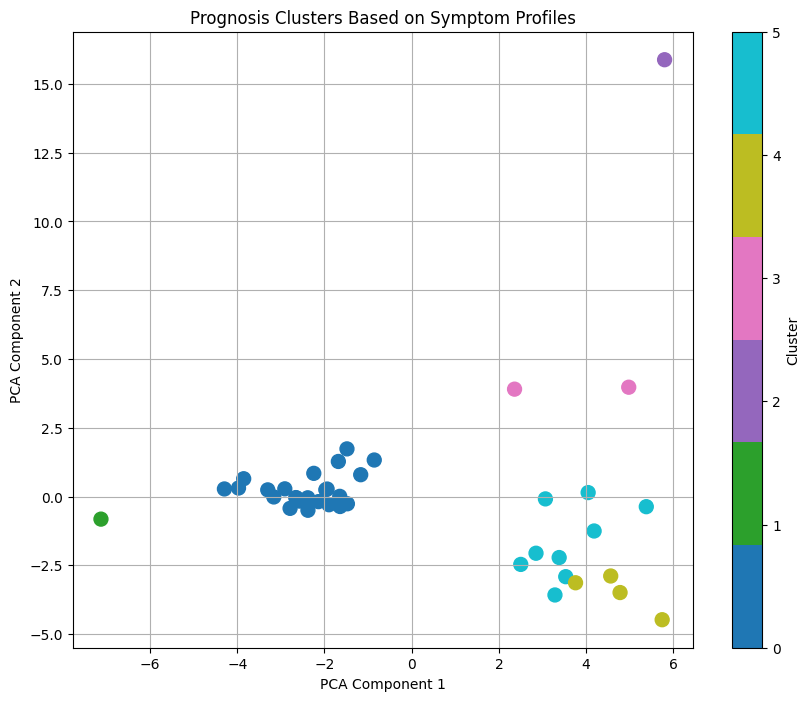

In [179]:
# plot clusters 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to standardized symptom profiles (excluding the cluster column)
numeric_data = scaled_full_data.select_dtypes(include='number')

pca = PCA(n_components=2)
reduced = pca.fit_transform(numeric_data)

# Convert into Numpy as it was returning a DataFrame
reduced = np.array(reduced)

# Get unique cluster labels
unique_clusters = sorted(scaled_full_data['cluster'].unique())
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=scaled_full_data['cluster'], cmap=colors, s=100)

plt.title("Prognosis Clusters Based on Symptom Profiles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()

In [180]:
print("Inertia:", kmeans.inertia_)

Inertia: 127.26388828613628


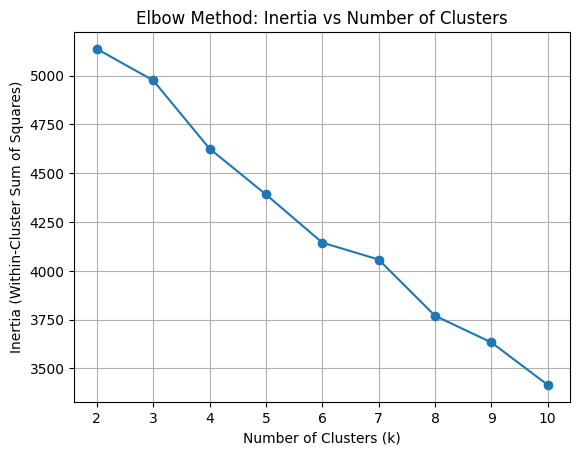

In [181]:
# Compare inertia across different k values
# Create the elbow plot

X = scaled_full_data.drop(columns='cluster').select_dtypes(include='number')

scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(X)
    scores.append(km.inertia_)

plt.plot(range(2, 11), scores, marker='o')
plt.title("Elbow Method: Inertia vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


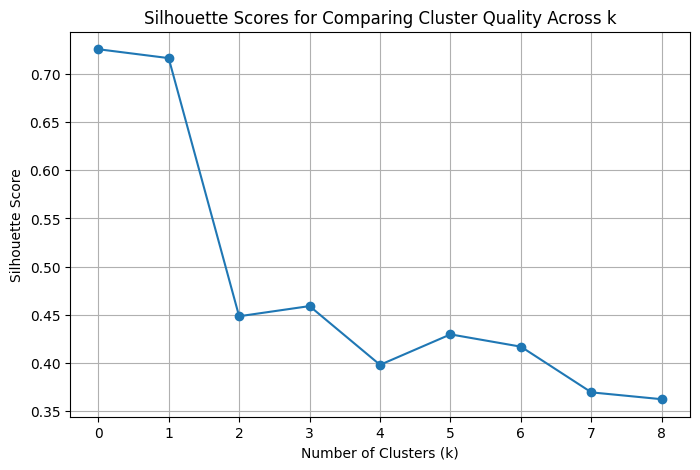

In [182]:
# for stronger validation used silhouetter_score
# The silhouette score measures how well each point fits in its assigned cluster —
# balancing closeness within its cluster and distance from other clusters.
# The higher the score, the better your clusters are defined.

# sc = how close a point is to its own cluster versus how far it is from the next closest cluster


import matplotlib.pyplot as plt

X = reduced_features

scores = []

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(scores, marker='o')
plt.title("Silhouette Scores for Comparing Cluster Quality Across k")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()


In [183]:
import pandas as pd

diseases = scaled_full_data.loc[X.index, 'prognosis'].values


cluster_df = pd.DataFrame({
    'Disease': diseases,
    'Cluster': labels
})

# Group by cluster
for cluster_id in sorted(cluster_df['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    print(cluster_df[cluster_df['Cluster'] == cluster_id]['Disease'].tolist())



Cluster 0:
['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Arthritis', 'Cervical spondylosis', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'Gastroenteritis', 'Impetigo', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Psoriasis', 'Urinary tract infection', 'Varicose veins']

Cluster 1:
['Hypothyroidism']

Cluster 2:
['Common Cold']

Cluster 3:
['Hepatitis B', 'Hepatitis D', 'Hepatitis E', 'hepatitis A']

Cluster 4:
['Diabetes ', 'Hyperthyroidism', 'Hypoglycemia', 'Migraine']

Cluster 5:
['Pneumonia']

Cluster 6:
['Alcoholic hepatitis', 'Chronic cholestasis', 'Hepatitis C', 'Jaundice', 'Peptic ulcer diseae', 'Typhoid']

Cluster 7:
['Chicken pox', 'Dengue']

Cluster 8:
['Allergy', 'Bronchial Asthma', 'GERD', 'Heart attack', 'Hypertension ', 'Malaria']

Cluster 9:
['Tuberculosis']
